# Chap5 회귀

- 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법
- 독립변수 - 피처, 종속변수 - 결정 값
- 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것
- 선형 회귀 : 실제 값과 예측값의 차이를 최소화는 직선형 회귀선을 최적화하는 방식
    - 일반 선형 회귀 : 예측값과 실제 값의 RSS를 최소화할 수 있도록 회귀 계수를 최적화, 규제 적용X
    - 릿지(Ridge) : 선형 회귀에 L2 규제를 추가한 회귀 모델. L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해 회귀 계수값을 더 작게 만드는 규제 모델
    - 라쏘(Lasso) : 선형 회귀에 L1 규제를 적용한 방식. L1 규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것
    - 엘라스틱넷(ElasticNet) : L2, L1 규제를 함께 결합한 모델. 피처가 많은 데이터 세트에 적용. L1 규제로 피처의 개수 줄임과 동시에 L2 규제로 계수 값의 크기 조정
    - 로지스틱 회귀(Logistic Regression) : 분류에 사용되는 선형 모델. 이진 분류뿐만 아니라 희소 영역의 분류, 텍스트 분류와 같은 영역에서 뛰어난 예측 성능

## 단순 선형 회귀를 통한 회귀 이해

- 단순 선형 회귀 : 독립변수 1개, 종속 변수 1개인 선형 회귀
- 기울기 w1, 절편 w0을 회귀 계수로 지칭
- 잔차 : 실제 값과 회귀 모델의 차이에 따른 오류 값
- 최적의 회귀 모델을 만든다는 것 = 전체 데이터의 잔차 합이 최소가 되는 모델 만든다는 것 = 오류 값 합이 최소가 될 수 있는 최적의 회귀 계수 찾는다는 것
- 오류 합 계산할 때 - Mean Absolute Error, Residual Sum of Square
- Error^2 = RSS
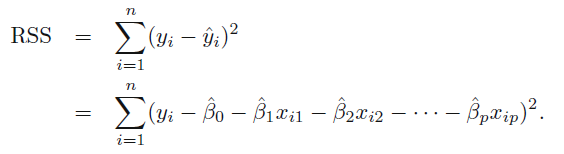

## 비용 최소화하기 - 경사 하강법(Gradient Descent)

- '점진적으로' 반복적인 계산을 통해 W 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W 파라미터 구하기
- 즉 예측값과 실제 값의 차이가 작아지는 방향성을 가지고 W 파라미터를 지속해서 보정해 나감
- 오류 값이 더 이상 작아지지 않으면 그 오류 값을 최소 비용으로 판단하고 그때의 W 값을 최적 파라미터로 반환
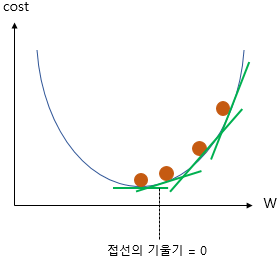

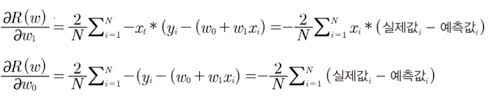

- 새로운 w1을 이전 w1에서 편미분 결괏값을 빼면서 적용

1. w1, w0 임의의 값으로 설정하고 첫 비용 함수 값 계산
2. w1을 편미분 결괏값으로 뺀 값, w0을 편미분 결괏값으로 뺀 값으로 업데이트한 후 다시 비용함수 값 계산
3. 바용 함수 값이 감소했으면 다시 2번 반복. 더 이상 값이 감소하지 않으면 그때의 w1, w0 구하고 반복 중지

In [2]:
# 간단한 회귀식 y=4X+6에 근사하기 위한 100개의 데이터 세트 만들고 경사 하강법 이용해 회귀계수 도출하기
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

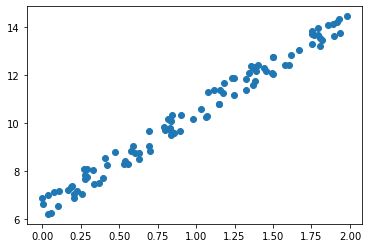

In [3]:
np.random.seed(1)
X = 2*np.random.rand(100, 1)
y=6+4*X+np.random.rand(100, 1)

plt.scatter(X, y)

In [4]:
# 비용 함수 정의
def get_cost(y, y_pred):
    N=len(y)
    cost=np.sum(np.square(y-y_pred))/N
    return cost

In [5]:
# 경사하강법 정의
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N=len(y)
    
    # 먼저 w1_update, w2_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    
    # 예측 배열 계산하고 예측과 실제 값 차리 계산
    y_pred = np.dot(X, w1.T)+w0  #내적
    diff = y-y_pred
    
    #w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N, 1))
    
    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [6]:
# 경사 하강 방식으로 반복적으로 수행해 파라미터 업데이트
def gradient_descent_steps(X, y, iters=10000):
    # 초기화
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1=w1-w1_update
        w0=w0-w0_update
        
    return w1, w0

In [7]:
# RSS 차이 계산하는 함수 생성
def get_cost(y, y_pred):
    N=len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print('w1:{0:.3f} w0:{0:.3f}'.format(w1[0, 0], w0[0, 0]))
y_pred = w1[0, 0]*X+w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.045 w0:4.045
Gradient Descent Total Cost:0.1012


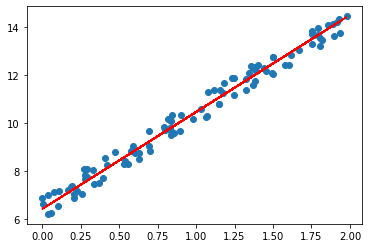

In [8]:
plt.scatter(X, y)
plt.plot(X, y_pred, 'r')

- 시간이 매우 오래 걸린다는 단점
- 확률적 경사 하강법 : 일부 데이터만 이용해 w가 업데이트되는 값 계산하므로 경사 하강법에 비해 빠른 속도 보장

In [11]:
# 미니 배치 확률적 경사 하강법 이용해 최적 비용함수 도출하기

In [13]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    
    prev_cost = 100000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출해 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1=w1-w1_update
        w0=w0-w0_update
    
    return w1, w0

In [18]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print('w1:', round(w1[0, 0], 3), 'w0:',round(w0[0, 0], 3))
y_pred = w1[0, 0]*X+w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.048 w0: 6.422
Stochastic Gradient Descent Total Cost:0.1015


## 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

### LinearRegression 클래스 - Ordinary Least Squares

- 예측값과 실제 값의 RSS를 최소화해 OLS 추정 방식으로 구현한 클래스
- fit() 메서드로 X, y 배열을 입력 받으면 회귀 계수인 W를 coef_ 속성에 저장

- 입력 파라미터
    - fit_intercept : boolean, 디폴트 True, intercept 값을 계산할 것인지 말지 지정, False면 intercept가 사용되지 않고 0으로 지정
    - normalize : boolean, 디폴트 False, fit_intercept가 False인 경우 이 파라미터 무시, 만일 True면 회귀 수행 전 입력 데이터 세트를 정규화
- 속성
    - coef_ : fit() 메서드 수행 시 회귀 계수가 배열 형태로 저장하는 속성. Shape는 (Target 값 개수, 피처 개수)
    - intercept_ : intercept 값

- 입력 피처의 독립성에 많은 영향 받음
- 피처 간의 상관관계가 매우 높은 경우 분산이 매우 커져 오류에 매우 민감해짐 ⇒ 다중 공선성 문제
- 상관관계가 높은 피처가 많은 경우 독립적인 중요한 피처만 남기고 제거하거나 규제 적용
- 매우 많은 피처가 다중 공선성 문제를 가지고 있다면 PCA를 통해 차원 축소를 수행하는 것 고려

### 회귀 평가 지표

- MAE : Mean Absolute Error, 실제 값과 예측값이 차이를 절댓값으로 변환해 평균한 것
- MSE : Mean Squared Error, 실제 값과 예측값의 차이를 제곱해 평균한 것
- RMSE : Root Mean Squared Error, MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있으므로 MSE에 루트 씌운 것
- R<sup>2</sup> : 분산 기반으로 예측 성능 평가, 실제 값의 분산 대비 예측값의 분산 비율을 지표로, 1에 가까울수록 예측 정확도 높음

- 사이킷런엣서 RMSE 제공X → MSE에 제곱근 씌워서 계산

- 각 평가 방법에 대한 사이킷런의 API 및 cross_val_score나 GridSearchCV에서 평가 시 사용되는 scoring 파라미터 적용 값

|        평가 방법        |    사이킷런 평가 지표 API   | Scoring 함수 적용 값 |
|:------------------:|:-------------:|:------:|
|  MAE | metrics.mean_absolute_error | 'neg_mean_absolute_error' |
|  MSE | metrics.mean_squared_error | 'neg_mean_squared_error' |
|  R<sup>2</sup> | metrics.r2_score | 'r2' |

- MAE의 scoring 파라미터 값을 보면 neg_라는 접두어가 있는데 이는 Negative 값을 가진다는 의미
- MAE는 절댓값의 합이기 때문에 음수가 될 수 없음
- Scoring 함수에 이를 적용해 음수값을 반환하는 이유는 사이킷런의 Scoring 함수가 score 값이 클수록 좋은 평가 결과로 자동 평가하기 때문
- 회귀 평가 지표의 경우 값이 커지면 오히려 나쁜 모델이라는 의미이므로 사이킷런의 Scoring 함수에 일반적으로 반영하려면 보정 필요
- 따라서 -1을 원래 지표에 곱해 음수를 만들어 작은 오류 값이 더 큰 숫자로 인식하게 함

### LinearRegression을 이용해 보스턴 주택 가격 회귀 구현

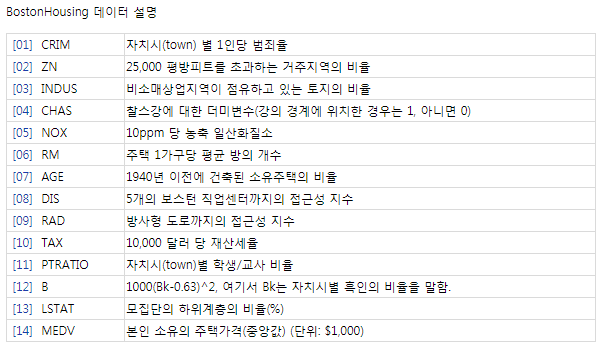

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [5]:
boston = load_boston()

In [6]:
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

In [7]:
# target = 주택 가격
bostonDF['PRICE'] = boston.target
print('Boston 데이터 세트 크기:', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


- Null값 없고 모두 float형

각 칼럼이 회귀 결과에 미치는 영향이 어느 정도인지 시각화해보기
- seaborn의 regplot() : X, Y축 값의 산점도화 함께 선형 회귀 직선 그려줌
- matplotlib.subplots() : 각 ax마다 칼럼과 PRICE의 관계 표현
    - ncols : 열 방향으로 위치할 그래프 개수
    - nrows : 행 방향으로 위치할 그랲 ㅡ개수

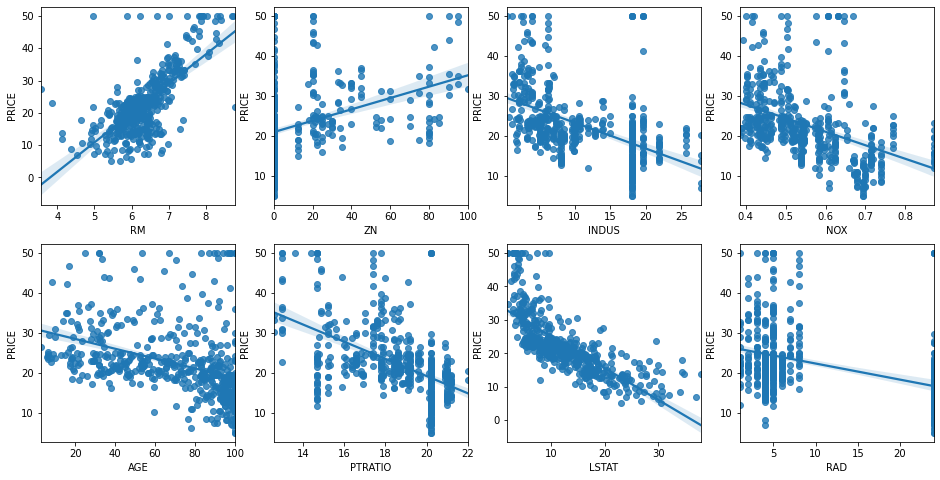

In [9]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선 함께 표현
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

- RM과 LSTAT의 PRICE 영향도가 가장 두드러지게 나타남
- RM(방개수) 양 방향의 선형성이 가장 큼
- LSTAT(하위 계층의 비율) 음 방향의 선형성이 가장 큼

In [10]:
# LinearRegression 클래스를 이용해 회귀 모델 만들기
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [12]:
# 절편과 화귀계수
print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164336
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [13]:
# 회귀 계수 값 피처별 회귀 계수 값으로 매핑, 높은 값 순으로 출력
coeff = pd.Series(data=np.round(lr.coef_, 1), index = X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

- RM 양의 값으로 회귀 계수 가장 큼
- NOX 피처의 회귀 계수 - 값이 너무 큼 → 최적화 수행하면서 계수 변화 살펴볼 것

5개의 폴드 세트에서 cross_val_score() 이용해 교차 검증으로 MSE, RMSE 측정해보기

In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)  # cross_val_score의 반환값이 음수이므로 -1을 곱해야 양의 값인 원래 모델에서 계산된 MSE 값
avg_rmse = np.mean(rmse_scores)

print('5 folds 의 개별 Negative MSE scores:', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE :', np.round(avg_rmse, 3))

5 folds 의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE : 5.829


## 다항 회귀와 과(대)적합/과소적합 이해

- 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것
- 선형 회귀
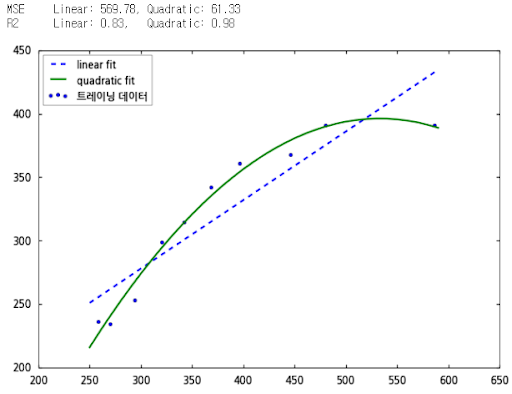

- PolynomialFeatures 클래스 통해 피처를 Polynomial 피처로 변환
- degree 파라미터를 통해 입력 받은 단항식 피처를 degree에 해당하는 다항식 피처로 변환

In [16]:
# 단항값을 2차 다항값으로 변환하는 예제
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [20]:
X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 피처:\n', X)

poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


x1, x1<br>
1, x1, x2, x1<sup>2</sup> x1x2, x2<sup>2</sup>

In [21]:
# 3차 다항 계수 이용해 3차 다항 회귀 함수식 유도해보기
# 3차 다항 회귀 함수 임의로 설정하고 회귀 계수 예측
def polynomial_func(X):
    y = 1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
    return y

In [22]:
X=np.arange(4).reshape(2, 2)
print('일차 단항식 계수 feature:\n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값:\n', y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
삼차 다항식 결정값:
 [  5 125]


In [23]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature:\n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape:', model.coef_.shape)

3차 다항식 계수 feature:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape: (10,)


처음에 가정한 회귀 함수식 : y = 1 + 2x<sub>1</sub> + 3x<sub>1</sub><sup>2</sup> + 4x<sub>2</sub><sup>3</sup><br>
계수 값 = [1, 2, 0, 3, 0, 0, 0, 0, 0, 4]<br>
차이는 있지만 다항 회귀로 근사하고 있음

In [25]:
# Pipeline 객체를 이용해 한 번에 다항 회귀 구현 코드 명료하게!
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

In [26]:
def polynomial_func(X):
    y = 1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
    return y

model = Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear', LinearRegression())])
X = np.arange(4).reshape(2, 2)
y = polynomial_func(X)

model = model.fit(X, y)

print('Polynomial 회귀 계수 \n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 다항 회귀를 이용한 과소적합 및 과적합 이해

- 다항식의 차수가 높아질수록 매우 복잡한 피처 간의 관계까지 모델링 가능
- 하지만 차수를 높일수록 테스트 데이터 화경에서 오히려 예측 정확도 떨어짐 ⇒ 과적합 문제

과적합 잘 보여주는 예제
- 데이터 세트 : 피처 X, target y가 잡음이 포함된 다항식의 코사인 그래프 관계 가지도록 만들어줌
- 다항 회귀의 차수를 변화시키면서 그에 따른 회귀 예측 곡선과 예측 정확도 비교

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [29]:
# 임의의 값으로 구성된 X값에 대해 코사인 변환 값 반환
def true_fun(X):
    return np.cos(1.5*np.pi*X)

In [30]:
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

y = true_fun(X) + np.random.randn(n_samples)*0.1


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE는 0.40772896250986834입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.04320874987231747입니다.

Degree 15 회귀 계수는 [-2.98295000e+03  1.03899930e+05 -1.87417069e+06  2.03717225e+07
 -1.44873988e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08] 입니다.
Degree 15 MSE는 182815433.47648773입니다.


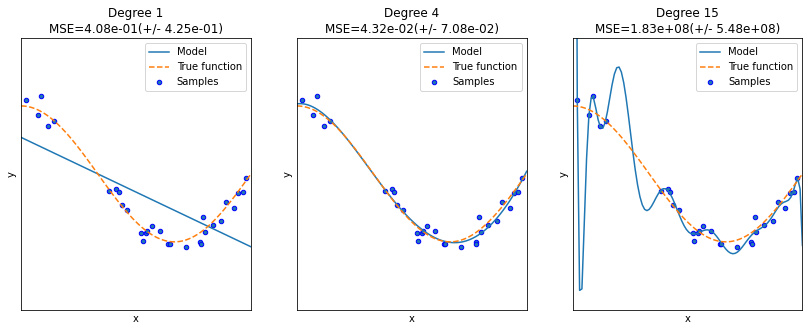

In [32]:
# 비교할 다항식 차수 1, 4, 15
# MSE로 예측 성능 평가
# 차수별 회귀 예측 곡선 그리기

plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree 별로 Polynomial 반환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀 평가
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring="neg_mean_squared_error", cv=10)
    # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print("\nDegree {} 회귀 계수는 {} 입니다.".format(degrees[i], np.round(coefficients, 2)))
    print('Degree {} MSE는 {}입니다.'.format(degrees[i], -1*np.mean(scores)))
    
    # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려 비교
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x");plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2));plt.legend(loc="best")
    plt.title("Degree {}\nMSE={:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    
plt.show()

- 실선 : 예측 곡선, 점선 : 실제 데이터 세트의 코사인 곡선

- 맨 왼쪽 곡선 : 산순 선형 회귀, 예측 곡선이 학습 데이터의 패턴 제대로 반영하지 못하고 있는 과소적합 모델
- 가운데 곡선 : 실제 데이터 세트와 유사한 모습. 학습 데이터 세트를 비교적 잘 반영해 테스트 데이터를 잘 예측한 곡선
- 맨 오른쪽 곡선 : MSE 값이 어처구니가 없음. 학습 데이터 세트만 정확히 예측하고 테스트 값의 실제 곡선과는 완전히 다른 형태의 예측 곡선. 과적합

### 편향-분산 트레이드오프(Bias-Variance Trade off)

- Degree 1과 같은 모델은 매우 단순화된 모델로 지나치게 한 방향성으로 치우진 경향 = 고편향(High Bias)성 가짐
- Degree 15와 같은 모델은 학습 데이터 하나하나의 특성 반영하면서 지나치게 높은 변동성 = 고분산(High Variance)성 가짐
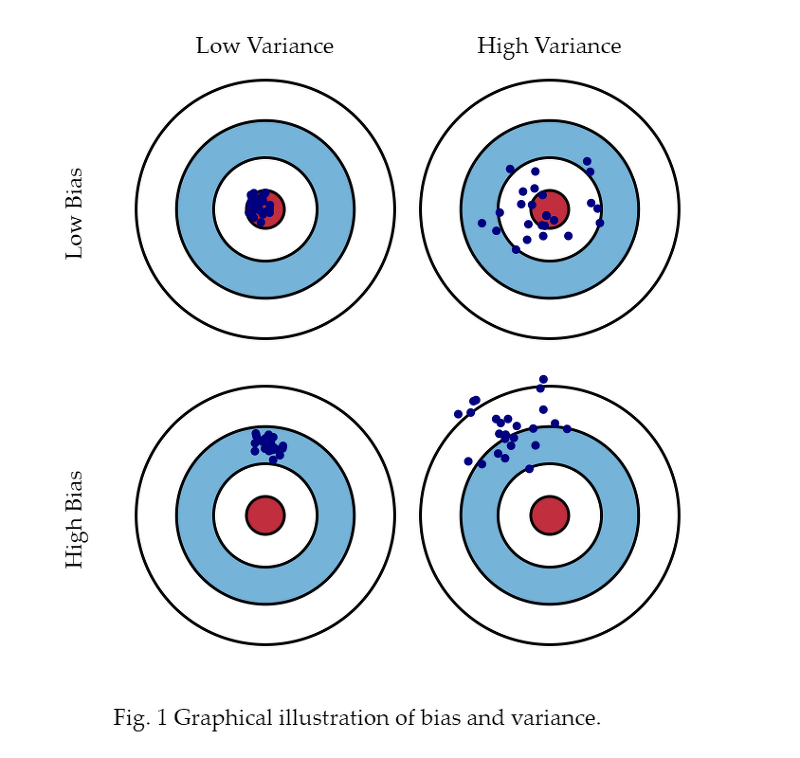

- 편향이 높으면 분산은 낮아지고(과소적합) 분산이 높으면 편향이 낮아짐(과적합)
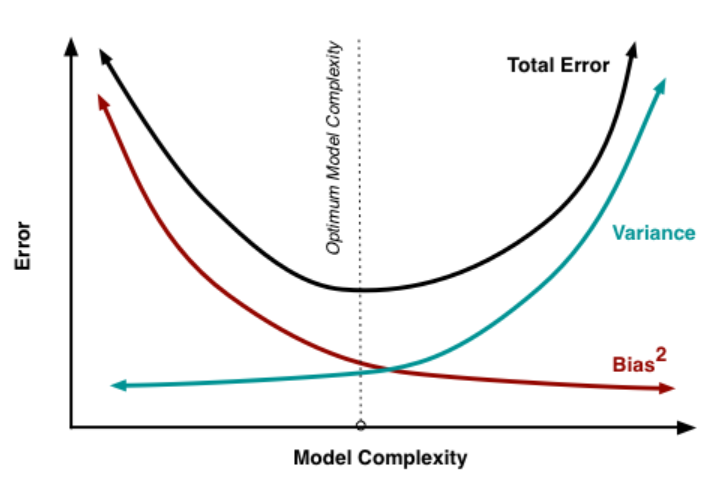

## 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷

- 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는 것 제어할 수 있어야함
- 전) RSS 최소화, 실제 값과 예측값 차이 최소화하는 것만 고려 → 학습 데이터에 지나치게 맞춰짐. 변동성 심해져 테스트 데이터에 예측 성능 저하 쉬움
- 비용함수는 RSS 최소화 방법과 과적합 방지하기 위해 회귀 계수 값이 커지지 않도록 하는 방법 균형 이뤄야 함
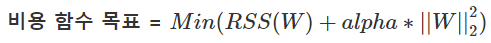

- alpha : 학습 데이터 적합 정도와 회귀 계수 값의 크기 제어하는 튜닝 파라미터
- alpha 값↑ 비용 함수는 회귀 계수 W의 값을 작게 해 과적합 개선해야 함
- alpha 값↓ 회귀 계수 W 값이 커져도 상쇄가 가능하므로 학습 데이터 적합 개선 가능

- alpha 0부터 값 증가시키면(alpha로 페널티 부여) 회귀 계수 값의 크기 감소시킬 수 있음 ⇒ 규제(Regularization)
- L2 규제 : W의 제곱에 대해 페널티를 부여하는 방식 ⇒ 이 방식 적용한 회귀 = 릿지(Ridge)
- L1 규제 : W의 절댓값에 대해 페널티 부여, 영향력이 크지 않은 회귀 계수 값을 0으로 변환 ⇒ 라쏘(Lasso)

### 릿지 회귀

보스턴 주택 가격 Ridge 클래스 이용해 예측 후 예측 성능 cross_val_score()로 평가하기

In [3]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [15]:
# alpha=10
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)  # cross_val_score의 반환값이 음수이므로 -1을 곱해야 양의 값인 원래 모델에서 계산된 MSE 값
avg_rmse = np.mean(rmse_scores)

print('5 folds 의 개별 Negative MSE scores:', np.round(neg_mse_scores, 3))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores, 3))
print('5 folds의 평균 RMSE :', np.round(avg_rmse, 3))

5 folds 의 개별 Negative MSE scores: [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 RMSE scores: [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 RMSE : 5.518


규제가 없는 LinearRegression의 RMSE 평균인 5.829보다 더 뛰어난 예측 성능

alpha 값 변호하면서 RMSE 값과 각 피처의 회귀 계수 시각화하고 DataFrame에 저장

In [16]:
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    
    print('alpha {0} 일 때 5 folds의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

alpha 0 일 때 5 folds의 평균 RMSE : 5.829
alpha 0.1 일 때 5 folds의 평균 RMSE : 5.788
alpha 1 일 때 5 folds의 평균 RMSE : 5.653
alpha 10 일 때 5 folds의 평균 RMSE : 5.518
alpha 100 일 때 5 folds의 평균 RMSE : 5.330


alpha가 100일 때 RMSE가 5.330로 가장 좋음

alpha 값 변화에 따른 피처의 회귀 계수 값을 가로 막대 그래프로 시각화해보기

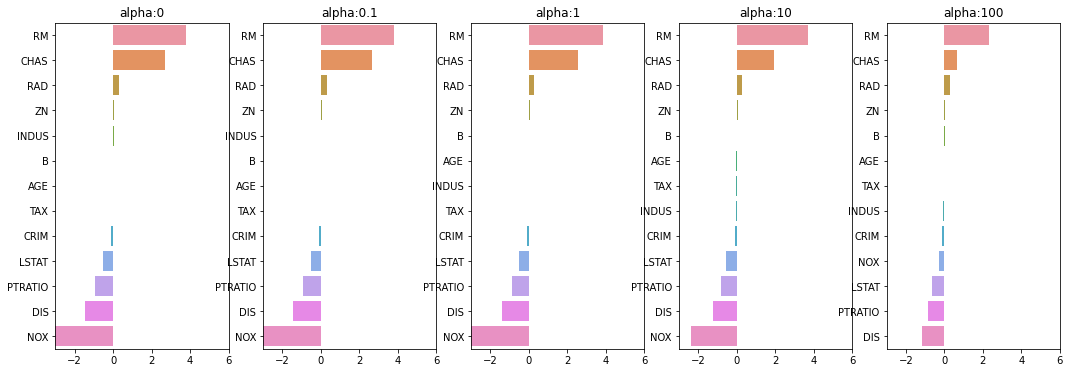

In [18]:
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data, y_target)
    
    # alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname='alpha:'+str(alpha)
    coeff_df[colname]=coeff
    
    coeff = coeff.sort_values(ascending=False) #회귀 계수값 높은 순으로
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    
plt.show()

- alpha 값 증가될수록 회귀계수 작아짐

In [31]:
# alpha 값 변화에 따른 릿지 회귀 계수 값
ridge_alphas=[0, 0.1, 1, 10, 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


### 라쏘 회귀

- W의 절댓값에 페널티 부여하는 L1 규제를 선형 회귀에 적용한 것
- 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거

In [21]:
from sklearn.linear_model import Lasso, ElasticNet

In [60]:
# alpha 값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose : print('######', model_name, '######')
    for param in params:
        if model_name=='Ridge': model=Ridge(alpha=param)
        elif model_name=='Lasso': model=Lasso(alpha=param)
        elif model_name=='ElasticNet': model=ElasticNet(alpha=param, l1_ratio=0.7)

        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
        rmse_scores = np.sqrt(-1*neg_mse_scores)
        avg_rmse = np.mean(rmse_scores)

        print('alpha {0} 일 때 5 folds의 평균 RMSE : {1:.3f}'.format(param, avg_rmse))
        
        model.fit(X_data, y_target)
        
        # alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
        coeff = pd.Series(data=model.coef_, index=X_data.columns)
        colname='alpha:'+str(param)
        coeff_df[colname]=coeff
    return coeff_df

In [61]:
lasso_alphas=[0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

###### Lasso ######
alpha 0.07 일 때 5 folds의 평균 RMSE : 5.612
alpha 0.1 일 때 5 folds의 평균 RMSE : 5.615
alpha 0.5 일 때 5 folds의 평균 RMSE : 5.669
alpha 1 일 때 5 folds의 평균 RMSE : 5.776
alpha 3 일 때 5 folds의 평균 RMSE : 6.189


alpha가 0.07일 때 가장 좋은 평균 RMSE 보여줌

In [40]:
# alpha 값에 따른 피처별 회귀 계수
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


- alpha 값이 증가함에 따라 일부 피처의 회귀 계수 0으로 바뀜

### 엘라스틱넷 회귀

- L2 규제와 L1 규제 결합한 회귀
- 라쏘 회귀의 회귀 계수를 0으로 만드는 성향으로 인해 회귀 계수의 값이 급변할 수 있는데 이를 완화하기 위해 L2 규제를 추가한 것
- 상대적으로 시간이 오래걸림
- a*L1 + b*L2 : a는 L1 규제의 alpha값, b는 L2 규제의 alpha 값
- 엘라스틱넷 클래스의 alpha값 = a+b
- 엘라스틱넷 클래스의 l1_ratio 파라미터 값 = a / (a+b)

In [41]:
elastic_alphas=[0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_data, y_target_n=y_target)

###### ElasticNet ######
alpha 0.07 일 때 5 folds의 평균 RMSE : 5.542
alpha 0.1 일 때 5 folds의 평균 RMSE : 5.526
alpha 0.5 일 때 5 folds의 평균 RMSE : 5.467
alpha 1 일 때 5 folds의 평균 RMSE : 5.597
alpha 3 일 때 5 folds의 평균 RMSE : 6.068


In [43]:
# 회귀 계수 출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


- alpha 0.5일 때 RMSE가 5.467로 가장 좋은 예측 성능

### 선형 회귀 모델을 위한 데이터 변환

- 피처와 타깃값 간에 선형의 관계가 있다고 가정하고 이러한 최적의 선형함수를 찾아내 결과값 예측
- 피처값과 타깃값의 분포가 정규 분포 형태 매우 선호
- 스케일링/정규화 작업 수행

1. StandardScaler 클래스 이용해 평균 0, 분산 1인 표준 정규 분포를 가진 데이터 세트로 변환하거나 MinMaxScaler 클래스를 이용해 최솟값이 0이고 최댓값이 1인 값으로 정규화 수행
2. 스케일링/정규화를 수행한 데이터 세트에 다시 다항 특성 적용해 변환 (1번 방법을 통해 예측 성능에 향상이 없을 경우)
3. 로그 변환 (가장 빈번하게 사용되는 방법)

보스턴 주택가격 피처 데이터 세트에 표준 정규 분포 변환, 최댓값/최솟값 정규화, 로그 변환 차례로 적용한 후 RMSE로 각 경우별 예측 성능 측정해보기

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

In [55]:
# p_degree는 다항식 특성 추가할 때 적용. 2이상 부여하지않음
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method=='Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method=='MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method=='Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
    
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

In [62]:
alphas=[0.1, 1, 10, 100]

# 5개 방식으로 변환. 원본, 표준 정규 분포, 표준 정규분포+다항식
# 최대/최소 정규화, 최대/최소 정규화+다항식, 로그변환
scale_methods=[(None, None), ('Standard', None), ('Standard', 2), ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(scale_method[0], scale_method[1], input_data=X_data)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, y_target_n=y_target, verbose=True)


## 변환 유형:None, Polynomial Degree:None
###### Ridge ######
alpha 0.1 일 때 5 folds의 평균 RMSE : 5.788
alpha 1 일 때 5 folds의 평균 RMSE : 5.653
alpha 10 일 때 5 folds의 평균 RMSE : 5.518
alpha 100 일 때 5 folds의 평균 RMSE : 5.330

## 변환 유형:Standard, Polynomial Degree:None
###### Ridge ######
alpha 0.1 일 때 5 folds의 평균 RMSE : 5.826
alpha 1 일 때 5 folds의 평균 RMSE : 5.803
alpha 10 일 때 5 folds의 평균 RMSE : 5.637
alpha 100 일 때 5 folds의 평균 RMSE : 5.421

## 변환 유형:Standard, Polynomial Degree:2
###### Ridge ######
alpha 0.1 일 때 5 folds의 평균 RMSE : 8.827
alpha 1 일 때 5 folds의 평균 RMSE : 6.871
alpha 10 일 때 5 folds의 평균 RMSE : 5.485
alpha 100 일 때 5 folds의 평균 RMSE : 4.634

## 변환 유형:MinMax, Polynomial Degree:None
###### Ridge ######
alpha 0.1 일 때 5 folds의 평균 RMSE : 5.764
alpha 1 일 때 5 folds의 평균 RMSE : 5.465
alpha 10 일 때 5 folds의 평균 RMSE : 5.754
alpha 100 일 때 5 folds의 평균 RMSE : 7.635

## 변환 유형:MinMax, Polynomial Degree:2
###### Ridge ######
alpha 0.1 일 때 5 folds의 평균 RMSE : 5.298
alpha 1 일 때 5 folds의 평균 RMSE : 4.323
alpha 10 일 

- Log 변환을 보면 alpha가 0.1, 1, 10인 경우 모두 성능이 향상됨
- alpha가 100인 경우는 표준 정규 분포로 일차 변환 후 2차 다항식 변환을 했을 때 가장 성능이 향상됨
- 일반적으로 선형 회귀를 적용하려는 데이터 세트에 데이터 값의 분포가 심하게 왜곡되어 있을 경우 로그 변환을 적용하는 것이 좋음

## 로지스틱 회귀

- 선형 회귀 방식을 분류에 적용한 알고리즘
- 학습을 통해 선형 함수의 회귀 최적선을 찾는 것이 아니라 시그모이드(Sigmoid) 함수 최적선을 찾고 이 시그모이드 함수의 반환 값을 확률로 간주해 확률에 따라 분류를 결정하는 것
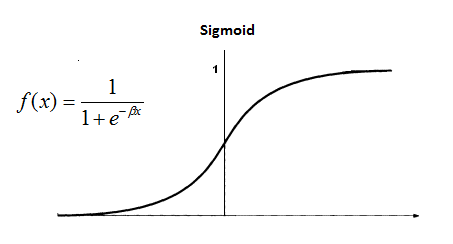

- 많은 자연, 사회 현상에서 특정 변수의 확률 값은 선형이 아니라 시그모이드 함수와 같이 S자 커브 형태를 가짐
- 이 함수는 x 값이 +, -로 아무리 커지거나 작아져도 y값은 항상 0과 1 사이 값을 반환

위스콘신 유방암 데이터 세트를 이용해 로지스틱 회귀로 암 여부 판단해보기

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [64]:
cancer = load_breast_cancer()

In [66]:
# 정규 분포 형태의 표준 스케일링 적용 후 데이터 세트 분리
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [67]:
# 학습 및 예측 수행, 정확도, ROC-AUC
from sklearn.metrics import accuracy_score, roc_auc_score

In [68]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

print('accuracy: {:.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {:.3f}'.format(roc_auc_score(y_test, lr_preds)))

accuracy: 0.977
roc_auc: 0.972


LogisticRegression 클래스의 주요 하이퍼 파라미터
- penalty : 규제 유형, l2(디폴트), l1
- C : alpha 역수

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
params={'penalty':['l2', 'l1'], 'C':[0.01, 0.1, 1, 5, 10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 1, 'penalty': 'l2'}, 최적 평균 정확도:0.975


## 회귀 트리

- 회귀를 위한 트리를 생성하고 이를 기반으로 회귀 예측 진행
- 리프 노드에 속한 데이터 값의 평균값을 구해 회귀 예측값 계산

- 결정 트리, 랜덤 포레스트, GBM, XGBoost, LightGBM 등의 모든 트리 기반 알고리즘은 분류뿐만 아니라 회귀도 가능
- 트리 생성이 CART(Classification And Regression Trees) 알고리즘에 기반하고 있기 때문

사이킷런의 랜덤 포레스트 회귀 트리인 RandomForestRegressor를 이용해 보스턴 주택 가격 예측 수행

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [4]:
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)

neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)  # cross_val_score의 반환값이 음수이므로 -1을 곱해야 양의 값인 원래 모델에서 계산된 MSE 값
avg_rmse = np.mean(rmse_scores)

print('5 folds 의 개별 Negative MSE scores:', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE :', np.round(avg_rmse, 3))

5 folds 의 개별 Negative MSE scores: [ -7.88 -13.14 -20.57 -46.23 -18.88]
5 folds의 개별 RMSE scores: [2.81 3.63 4.54 6.8  4.34]
5 folds의 평균 RMSE : 4.423


In [5]:
# 입력 모델과 데이터 세트 입력 받아 교차 검증으로 평균 RMSE 계산해주는 함수
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)  # cross_val_score의 반환값이 음수이므로 -1을 곱해야 양의 값인 원래 모델에서 계산된 MSE 값
    avg_rmse = np.mean(rmse_scores)
    print('##### ', model.__class__.__name__, ' #####')
    print('5 folds의 평균 RMSE :', np.round(avg_rmse, 3))

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [7]:
dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, X_data, y_target)

#####  DecisionTreeRegressor  #####
5 folds의 평균 RMSE : 5.978
#####  RandomForestRegressor  #####
5 folds의 평균 RMSE : 4.423
#####  GradientBoostingRegressor  #####
5 folds의 평균 RMSE : 4.269
#####  XGBRegressor  #####
5 folds의 평균 RMSE : 4.251
#####  LGBMRegressor  #####
5 folds의 평균 RMSE : 4.646


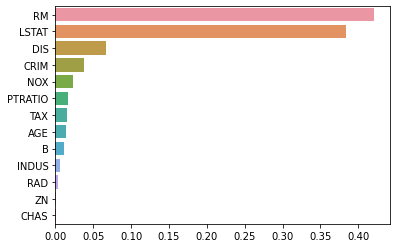

In [9]:
# 보스턴 주택 가격 모델의 피처별 중요도 시각화
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

회귀 트리 Regressor가 어떻게 예측값을 판단하는지 선형 회귀와 비교해 시각화하기<br>
Price와 가장 밀접한 양의 상관관계를 가지는 RM 칼럼만 이용해 선형 회귀와 결정 트리 회귀로 PRICE 예측 회귀선 표현해보기

(100, 2)


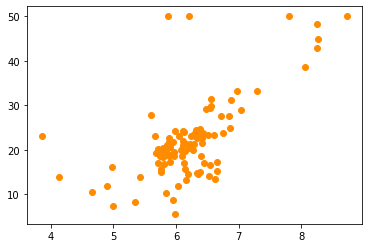

In [10]:
bostonDF_sample = bostonDF[['RM', 'PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100, random_state=0) # 100개만 샘플링
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")

In [11]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [14]:
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 세트를 4.5~8.5까지 100개 데이터 세트로 생성
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

X_feature = bostonDF_sample['RM'].values.reshape(-1, 1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1, 1)

lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

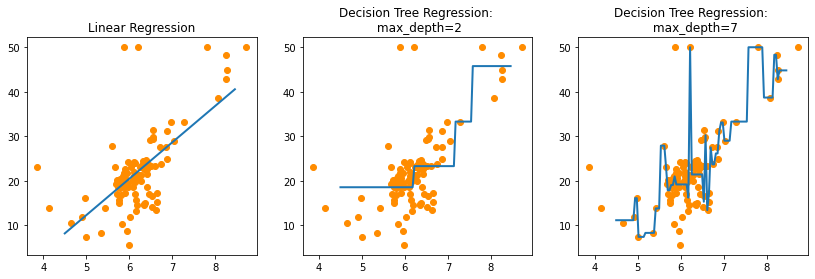

In [15]:
# 예측된 Price 회귀선 그리기
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14, 4), ncols=3)

ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax1.plot(X_test, pred_lr, label="linear", linewidth=2)

ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax2.plot(X_test, pred_rf2, label="max_depth:3", linewidth=2)

ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax3.plot(X_test, pred_rf7, label="max_depth:7", linewidth=2)

선형 회귀는 직선으로 예측 회귀선을 표현<br>
회귀 트리의 경우 분할되는 데이터 지점에 따라 브랜치 만들면서 계단 형태로 회귀선 만듦<br>
max_depth=7인 경우 학습 데이터 세트의 이상치 데이터도 학습하면서 복잡한 계단 형태의 회귀선 만들어 과적합이 되기 쉬운 모델이 됨

## 회귀 실습 - 자전거 대여 수요 예측

- 2011년 1월부터 2012년 12월까지 날짜/시간, 기온, 습도, 풍속 등의 정보를 기반으로 1시간 간격 동안 자전거 대여 횟수 기재<br><br>

- datetime : hourly date + timestamp
- season: 1=봄, 2=여름, 3=가을, 4=겨울
- holiday : 1=토, 일요일의 주말을 제외한 국경일 등의 휴일, 0=휴일이 아닌 날
- workingday : 1=토, 일요일의 주말 및 휴일이 아닌 주중, 0=주말 및 휴일
- weather
    - 1=맑음, 약간 구름 낀 흐림
    - 2=안개, 안개+흐림
    - 3=가벼운 눈, 가벼운 비+천둥
    - 4=심한 눈/비, 천둥/번개
- temp : 온도(섭씨)
- atemp : 체감온도(섭씨)
- humidity : 상대습도
- windspeed : 풍속
- casual : 사전에 등록되지 않는 사용자가 대여한 횟수
- registered : 사전에 등록된 사용자가 대여한 횟수

**[결정 값] count : 대여 횟수**

### 데이터 클렌징 및 가공

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [2]:
bike_df = pd.read_csv("./bike_train.csv")
print(bike_df.shape)
bike_df.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


- 10886개의 row 데이터 중 Null 데이터는 없음
- datetime 칼럼만 object형
- datetime 칼럼의 경우 년-월-일 시:분:초 문자 형식으로 되어 있으므로 가공 필요
- 판다스의 datetime 타입으로 변경해 년, 월, 일, 시간 칼럼 추출

In [4]:
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

bike_df['year']=bike_df.datetime.apply(lambda x:x.year)
bike_df['month']=bike_df.datetime.apply(lambda x:x.month)
bike_df['day']=bike_df.datetime.apply(lambda x:x.day)
bike_df['hour']=bike_df.datetime.apply(lambda x:x.hour)
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


- datetime 칼럼 삭제
- casual + registered = count이므로 casual과 registered도 상관도가 높아 예측을 저해할 우려가 있으므로 삭제

In [5]:
drop_columns=['datetime', 'casual', 'registered']
bike_df.drop(drop_columns, axis=1, inplace=True)

- 캐글에서 요구한 성능 평가 방법 : RMSLE(Root Mean Square Log Error)
- 사이킷런은 RMSLE 제공하지X
- RMSLE 수행하는 성능 평가 함수 만들기

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [11]:
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error =(log_y-log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

# MSE, RMSE, RMSLE 모두 계산
def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    mae_val = mean_absolute_error(y, pred)
    print('RMSLE:{0:.3f}, RMSE:{1:.3f}, MAE:{2:.3f}'.format(rmsle_val, rmse_val, mae_val))

### 로그 변환, 피처 인코딩과 모델 학습/예측/평가

In [12]:
# LinearRegression 객체를 이용해 회귀 예측
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [13]:
y_target = bike_df['count']
X_features = bike_df.drop(['count'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test, pred)

RMSLE:1.165, RMSE:140.900, MAE:105.924


- 예측 오류로서 비교적 큰 값
- 실제 값과 예측값이 어느 정도 차이 나는지 상위 5개만 확인

In [16]:
def get_top_error_data(y_test, pred, n_tops=5):
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count'] = np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    
    print(result_df.sort_values('diff', ascending=False)[:n_tops])

In [17]:
get_top_error_data(y_test, pred, n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


- 가장 큰 상위 5위 오류 값은 546~568로 실제 값을 감안하면 예측 오류가 꽤 큼
- Target 값의 분포가 왜곡된 형태를 이루고 있나?

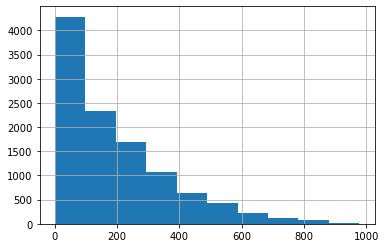

In [18]:
y_target.hist()

- count 칼럼 값이 정규 분포가 아닌 0~200 사이에 왜곡돼 있는 것 확인
- 로그 적용해 변환

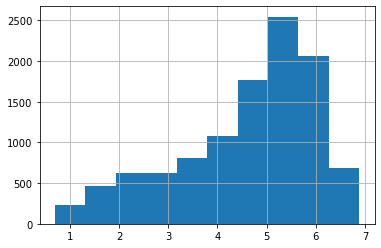

In [19]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

In [20]:
# 다시 학습 후 평가 수행
y_target_log = np.log1p(y_target)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 테스트 데이터 세트의 Target 값은 로그 변환됐으므로 다시 expm1 이용해 원래 스케일로 변환
y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp, pred_exp)

RMSLE:1.017, RMSE:162.594, MAE:109.286


RMSLE는 줄어들었지만 RMSE는 오히려 늘어남

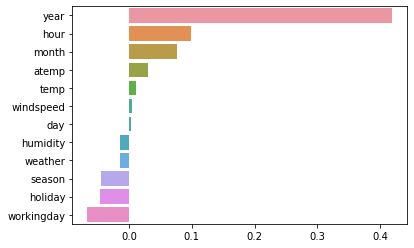

In [21]:
# 각 피처의 회귀계수 값 시각화
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

- year의 회귀 계수 값이 독보적으로 큼
- 2011, 2012년 두 개의 값으로 이루어져 있는데 year에 따라서 자전거 대여 횟수가 크게 영향받는다? 납득 어려움
- year는 카테고리형 피처지만 숫자형 값으로 되어 있음 + 2011, 2012라는 큰 값
- 따라서 이러한 피처 인코딩에 원-핫 인코딩을 적용해 변환해야 함

In [22]:
# year, month, day, hour 등의 피처 One-Hot Encoding
X_features_ohe = pd.get_dummies(X_features, columns=['year', 'month', 'day', 'hour', 'holiday', 'workingday', 'season', 'weather'])

In [26]:
# 원-핫 인코딩이 적용된 피처 데이터 세트 기반으로 학습/예측 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log, test_size=0.3, random_state=0)

# 모델과 학습/테스트 데이터 세트 입력하면 성능 평가 수치 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###', model.__class__.__name__, '###')
    evaluate_regr(y_test, pred)

In [27]:
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

### LinearRegression ###
RMSLE:0.590, RMSE:97.688, MAE:63.382
### Ridge ###
RMSLE:0.590, RMSE:98.529, MAE:63.893
### Lasso ###
RMSLE:0.635, RMSE:113.219, MAE:72.803


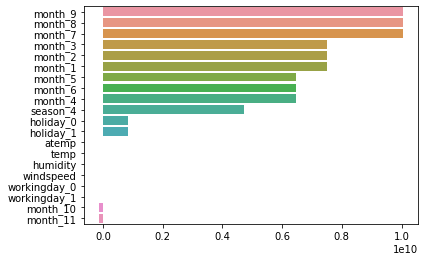

In [28]:
# 회귀 계수 상위 25개 피처 추출
coef = pd.Series(lr_reg.coef_, index = X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [29]:
# 회귀 트리 이용해 회귀 예측

In [30]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [32]:
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    get_model_predict(model, X_train.values, X_test.values, y_train.values, y_test.values, is_expm1=True) # 학습/테스트 데이터 ndarray로

### RandomForestRegressor ###
RMSLE:0.355, RMSE:50.353, MAE:31.092
### GradientBoostingRegressor ###
RMSLE:0.330, RMSE:53.330, MAE:32.741
### XGBRegressor ###
RMSLE:0.342, RMSE:51.732, MAE:31.251
### LGBMRegressor ###
RMSLE:0.319, RMSE:47.215, MAE:29.029


## 회귀 실습 - 캐글 주택 가격: 고급 회귀 기법

- 79개의 변수
- 미국 아이오와 주의 에임스(Ames) 지방의 주택 가격 정보
- 성능 평가 : RMSLE

### 데이터 사전 처리(Preprocessing)

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
house_df_org = pd.read_csv('house_price.csv')
house_df = house_df_org.copy()  # 데이터 가공을 많이 수행할 예정이므로 원본은 보관하고 복사해서 데이터 가공
house_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


- target = SalePrice

In [12]:
# 데이터 세트 전체 크기와 칼럼 타입, Null이 있는 칼럼과 그 건수 출력
print('데이터 세트의 Shape:', house_df.shape)
print('\n전체 피처의 type\n ', house_df.dtypes.value_counts())
isnull_series = house_df.isnull().sum()
print('\nNull 칼럼과 그 건수:\n ', isnull_series[isnull_series>0].sort_values(ascending=False))

데이터 세트의 Shape: (1460, 81)

전체 피처의 type
  object     43
int64      35
float64     3
dtype: int64

Null 칼럼과 그 건수:
  PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


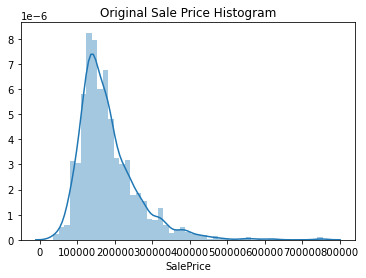

In [13]:
# 타깃 값의 분포도가 정규 분포인지 확인
plt.title('Original Sale Price Histogram')
sns.distplot(house_df['SalePrice'])

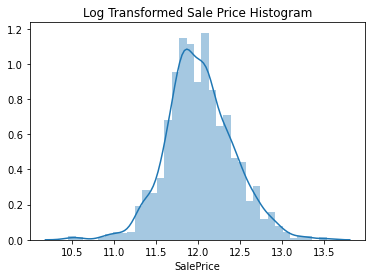

In [14]:
# 로그 변환 적용
plt.title('Log Transformed Sale Price Histogram')
log_SalePrice = np.log1p(house_df['SalePrice'])
sns.distplot(log_SalePrice)

In [15]:
# SalePrice 로그 변환 뒤 DataFrame에 반영
original_SalePrice = house_df['SalePrice']
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

# Null이 너무 많은 칼럼과 불필요한 칼럼 삭제
house_df.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

# 드롭하지 않은 숫자형 Null 칼럼은 평균값으로 대체
house_df.fillna(house_df.mean(), inplace=True)

# Null 값이 있는 피처명과 타입 추출
null_column_count = house_df.isnull().sum()[house_df.isnull().sum()>0]
print('## Null 피처의 Type:\n', house_df.dtypes[null_column_count.index])

## Null 피처의 Type:
 MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


- 이제 문자형 피처를 제외하고 Null 값이 없다!

In [17]:
# 문자형 피처 원-핫 인코딩 변환
print('get_dummies() 수행 전 데이터 Shape:', house_df.shape)
house_df_ohe = pd.get_dummies(house_df)
print('get_dummies() 수행 후 데이터 Shape:', house_df_ohe.shape)

null_column_count = house_df_ohe.isnull().sum()[house_df_ohe.isnull().sum()>0]
print('## Null 피처 Type:\n', house_df_ohe.dtypes[null_column_count.index])

get_dummies() 수행 전 데이터 Shape: (1460, 75)
get_dummies() 수행 후 데이터 Shape: (1460, 271)
## Null 피처 Type:
 Series([], dtype: object)


- 피처가 75개에서 272개로 증가
- Null 값 가진 피처 X

### 선형 회귀 모델 학습/예측/평가

In [18]:
# 로그 변환된 RMSE 계산하는 함수
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, ' 로그 변환된 RMSE:', np.round(rmse, 3))
    return rmse

def get_rmses(models):
    rmses=[]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [19]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [21]:
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models=[lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression  로그 변환된 RMSE: 0.132
Ridge  로그 변환된 RMSE: 0.128
Lasso  로그 변환된 RMSE: 0.176


[0.1318957657915436, 0.12750846334053045, 0.17628250556471395]

In [22]:
# 피처별 회귀 계수 시각화해서 모델별로 어떤 피처의 회귀 계수로 구성되는지 확인, 상위10개, 하위 10개
def get_top_bottom_coef(model, n=10):
    # coef_ 속성을 기반으로 Series 객체 생성, index는 칼럼명
    coef = pd.Series(model.coef_, index=X_features.columns)
    
    # 상위 10개, 하위 10개 회귀 계수 추출해 반환
    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)
    return coef_high, coef_low

In [24]:
# 가로 막대 그래프로 시각화
def visualize_coefficient(models):
    fig, axs = plt.subplots(figsize=(24, 10), nrows=1, ncols=3)
    fig.tight_layout()
    
    for i_num, model in enumerate(models):
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high, coef_low]) # 합치기
        
        axs[i_num].set_title(model.__class__.__name__+' Coefficients', size=25)
        axs[i_num].tick_params(axis="y", direction="in", pad=-120)     # y축 틱 설정, 틱 방향 안쪽으로, pad=틱과 레이블 거리
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i_num])

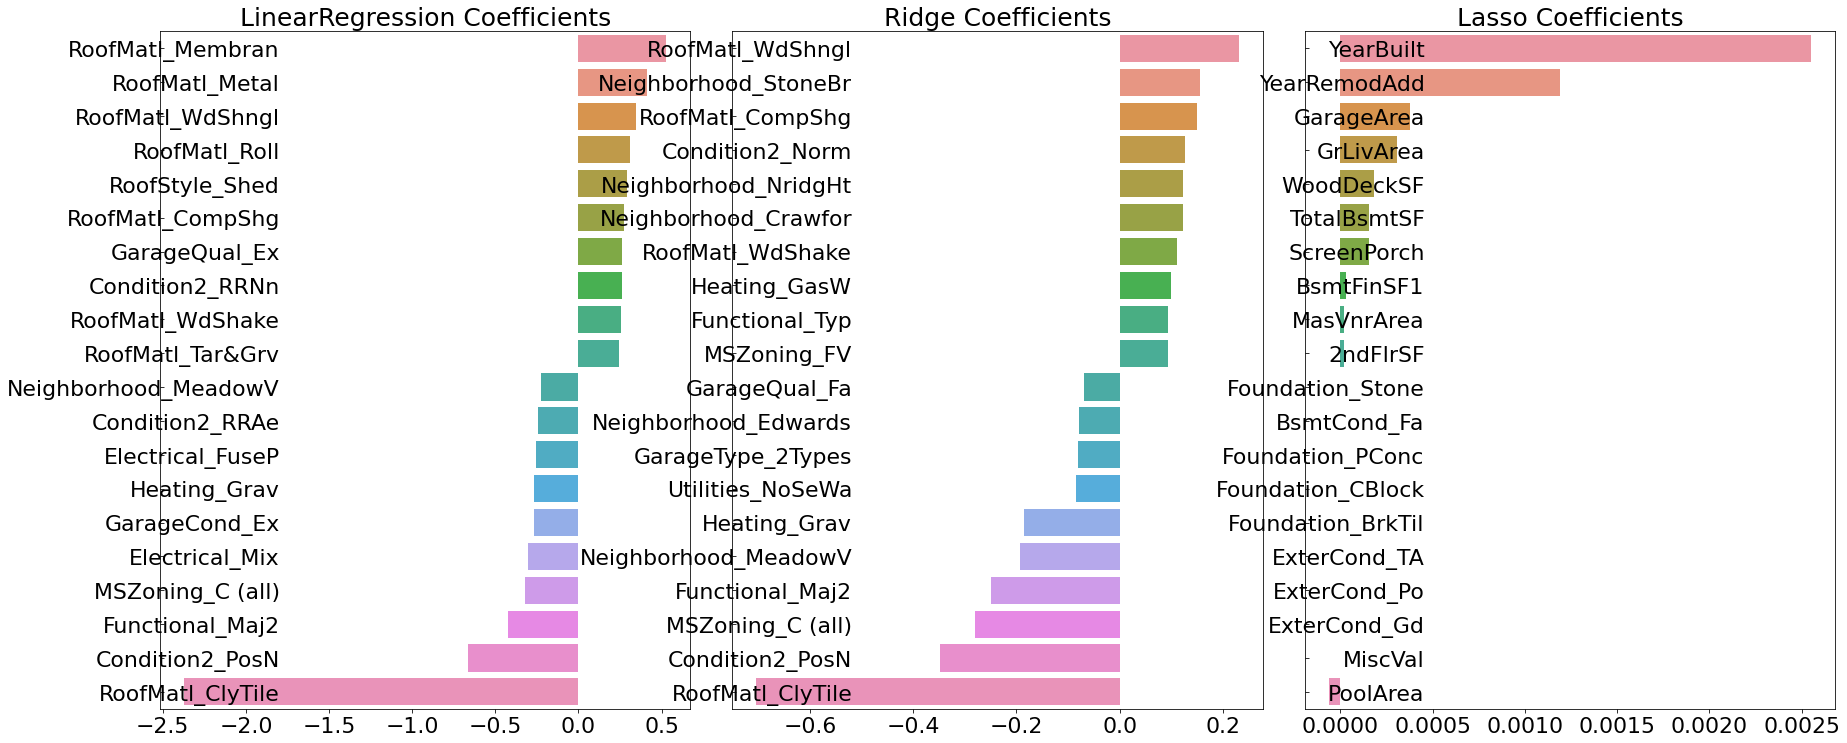

In [25]:
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

- LinearRegression과 Ridge의 경우 회귀 계수가 유사한 형태로 분포
- Lasso 전체적으로 회귀 계수 값이 매우 작고 그 중 YearBuilt가 가장 큼

In [26]:
# 데이터 분할에 문제가 있는 것일까?
# 5개의 교차 검증 폴드 세트고 분할해보자
from sklearn.model_selection import cross_val_score

In [29]:
def get_avg_rmse_cv(models):
    for model in models:
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target, scoring="neg_mean_squared_error", cv=5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format(model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format(model.__class__.__name__, np.round(rmse_avg, 3)))

In [30]:
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [0.135 0.165 0.168 0.111 0.198]
LinearRegression CV 평균 RMSE 값: 0.155

Ridge CV RMSE 값 리스트: [0.117 0.154 0.142 0.117 0.189]
Ridge CV 평균 RMSE 값: 0.144

Lasso CV RMSE 값 리스트: [0.161 0.204 0.177 0.181 0.265]
Lasso CV 평균 RMSE 값: 0.198


- 그래도 Lasso 성능이 낮음
- alpha 하이퍼 파라미터를 변화시키면서 최적 값 도출해보자!

In [31]:
from sklearn.model_selection import GridSearchCV

In [34]:
def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값:{1}, 최적 alpha:{2}'.format(model.__class__.__name__, np.round(rmse, 4), grid_model.best_params_))
    

In [35]:
ridge_params = {'alpha':[0.05, 0.1, 1, 4, 8, 10, 12, 15, 20]}
lasso_params = {'alpha':[0.001, 0.005, 0.008, 0.5, 0.03, 0.1, 0.5, 1, 5, 10]}
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값:0.1418, 최적 alpha:{'alpha': 12}
Lasso 5 CV 시 최적 평균 RMSE 값:0.142, 최적 alpha:{'alpha': 0.001}


LinearRegression  로그 변환된 RMSE: 0.132
Ridge  로그 변환된 RMSE: 0.124
Lasso  로그 변환된 RMSE: 0.12


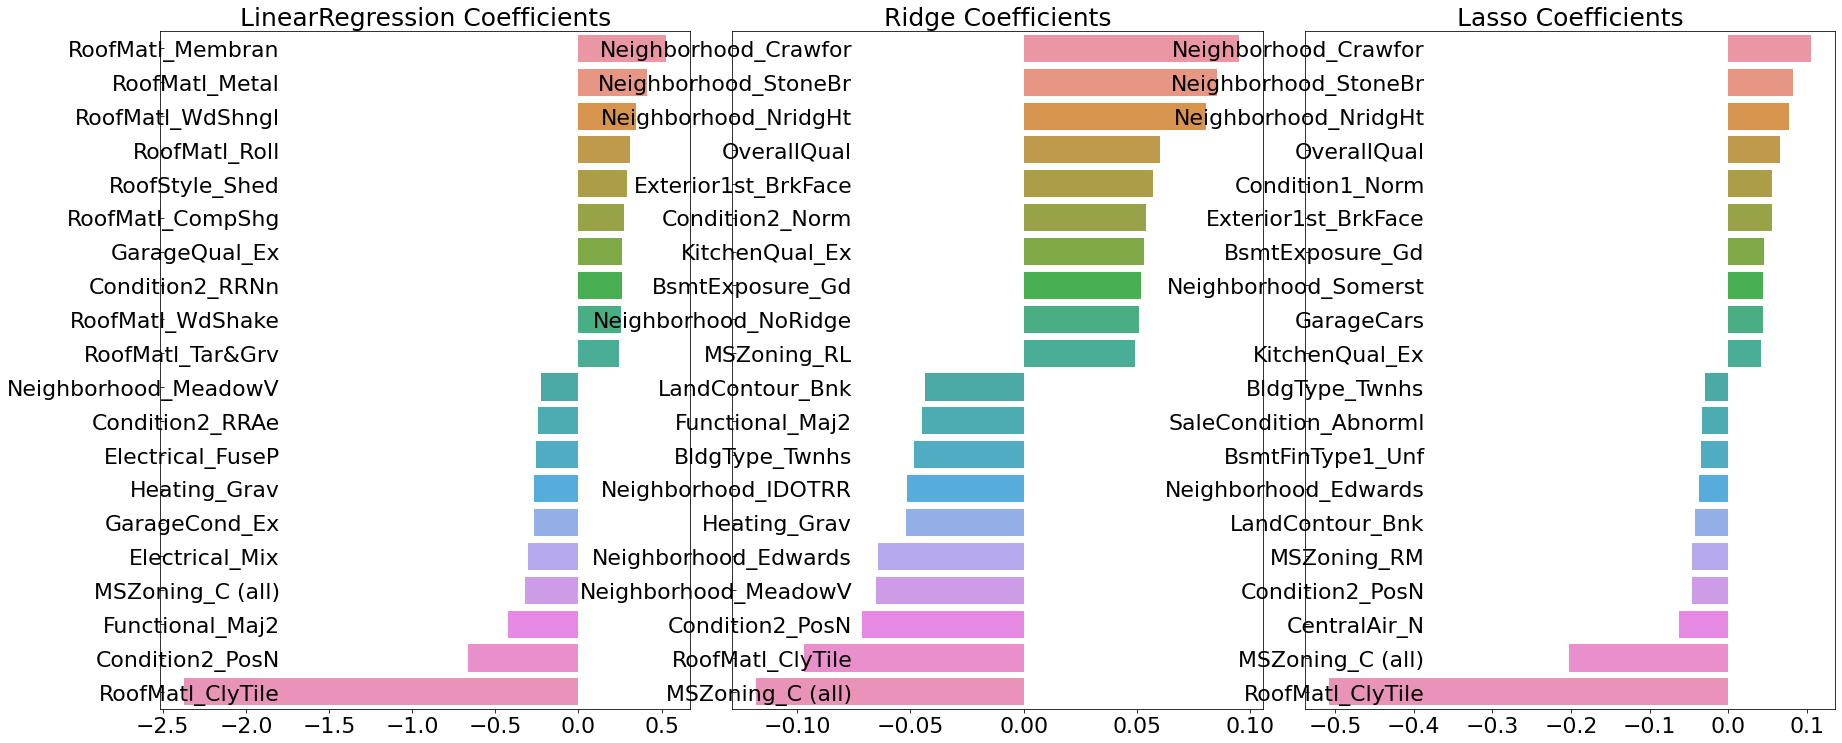

In [36]:
# 최적 alpha 값 설정한 뒤 모델 학습/예측/평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

models=[lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

- 예측 성능이 더 좋아졌지만 Lasso 모델의 경우 Ridge에 비해 동일한 피처라도 회귀 계수의 값이 상당히 작다

- 데이터 세트 분포도에서 왜곡 확인
- scipy의 stats 모듈의 skew() 함수 이용해 칼럼의 데이터 세트의 왜곡된 정보 추출
- 반환 값이 1이상인 경우 왜곡 정도가 높다고 판단
- 1 이상의 값을 반환하는 피처만 추출해 왜곡 정도를 완화하기 위해 로그 변환 적용하자
- skew() 적용하는 숫자형 피처에서 원-핫 인코딩된 카테고리 숫자형 피처는 제외해야 함
- 따라서 원-핫 인코딩이 적용되지 않은 house_df 사용

In [37]:
from scipy.stats import skew

In [38]:
# 숫자형 피처의 칼럼 index 객체 추출
features_index = house_df.dtypes[house_df.dtypes != 'object'].index
skew_features = house_df[features_index].apply(lambda x:skew(x))
# 왜곡 정도가 1 이상인 칼럼만 추출
skew_features_top = skew_features[skew_features>1]
print(skew_features_top.sort_values(ascending=False))

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64


In [39]:
# 추출된 왜곡 정도가 높은 피처 로그 변환
house_df[skew_features_top.index] = np.log1p(house_df[skew_features_top.index])

In [40]:
# 로그 변환한 피처 적용해 데이터 세트, 타깃 데이터 세트, 학습/테스트 데이터 세트 만들기
house_df_ohe = pd.get_dummies(house_df)
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

ridge_params = {'alpha':[0.05, 0.1, 1, 4, 8, 10, 12, 15, 20]}
lasso_params = {'alpha':[0.001, 0.005, 0.008, 0.5, 0.03, 0.1, 0.5, 1, 5, 10]}
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값:0.1275, 최적 alpha:{'alpha': 10}
Lasso 5 CV 시 최적 평균 RMSE 값:0.1252, 최적 alpha:{'alpha': 0.001}


- 둘다 RMSE 값 향상

LinearRegression  로그 변환된 RMSE: 0.128
Ridge  로그 변환된 RMSE: 0.122
Lasso  로그 변환된 RMSE: 0.119


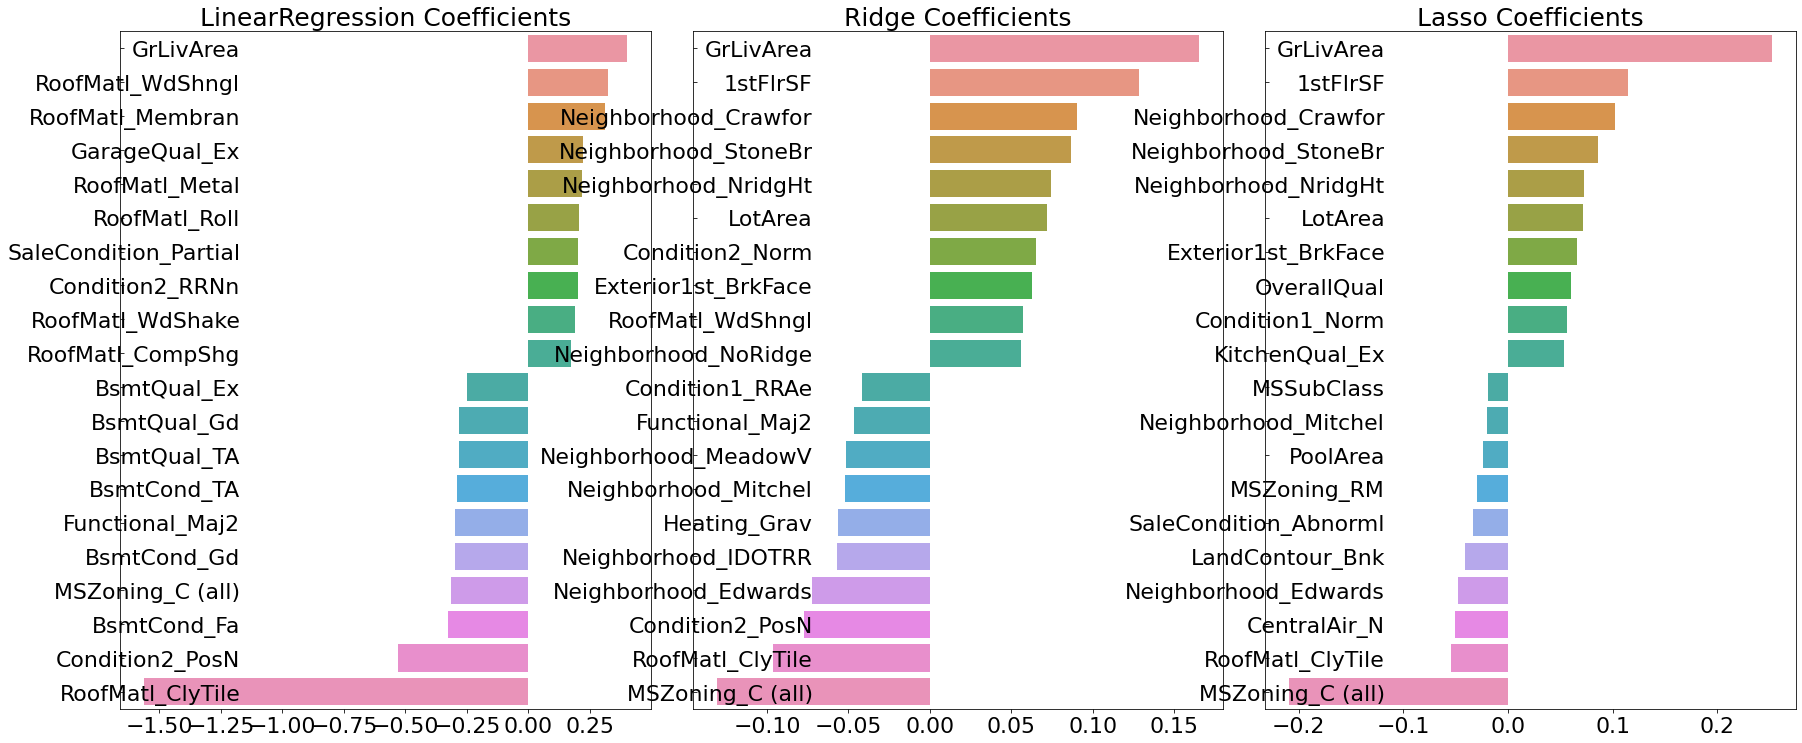

In [41]:
# 최적 alpha 값 설정한 뒤 모델 학습/예측/평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

models=[lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

- 세 모델 모두 GrLivArea, 주거 공간 크기가 회귀 계수가 가장 높은 피처 됨

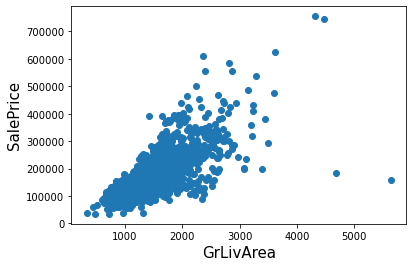

In [42]:
# 이상치 데이터 분석
# 가장 큰 회귀 계수인 GrLivArea 피처 데이터 분포
plt.scatter(x=house_df_org['GrLivArea'], y=house_df_org['SalePrice']) # 원본 데이터 세트
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

- 4000평방피트 이상임에도 가격이 500,000달러 이하인 데이터 이상치로 간주

In [43]:
# GrLivArea, SalePrice 모두 로그 변환됐으므로
cond1 = house_df_ohe['GrLivArea']>np.log1p(4000)
cond2 = house_df_ohe['SalePrice']<np.log1p(500000)
outlier_index = house_df_ohe[cond1&cond2].index

print('이상치 레코드 index :', outlier_index.values)
print('이상치 삭제 전 house_df_ohe shape:', house_df_ohe.shape)

# 이상치 레코드 삭제
house_df_ohe.drop(outlier_index, axis=0, inplace=True)
print('이상치 삭제 후 house_df_ohe shape:', house_df_ohe.shape)

이상치 레코드 index : [ 523 1298]
이상치 삭제 전 house_df_ohe shape: (1460, 271)
이상치 삭제 후 house_df_ohe shape: (1458, 271)


In [44]:
# 데이터 세트 다시 생성
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

ridge_params = {'alpha':[0.05, 0.1, 1, 4, 8, 10, 12, 15, 20]}
lasso_params = {'alpha':[0.001, 0.005, 0.008, 0.5, 0.03, 0.1, 0.5, 1, 5, 10]}
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값:0.1125, 최적 alpha:{'alpha': 8}
Lasso 5 CV 시 최적 평균 RMSE 값:0.1122, 최적 alpha:{'alpha': 0.001}


- 이상치 데이터 2개만 제거했는데 예측 수치가 매우 크게 향상됨!!
- GrLivArea 속성이 회귀 모델에서 차지하는 영향도가 크기 때문에

LinearRegression  로그 변환된 RMSE: 0.129
Ridge  로그 변환된 RMSE: 0.103
Lasso  로그 변환된 RMSE: 0.1


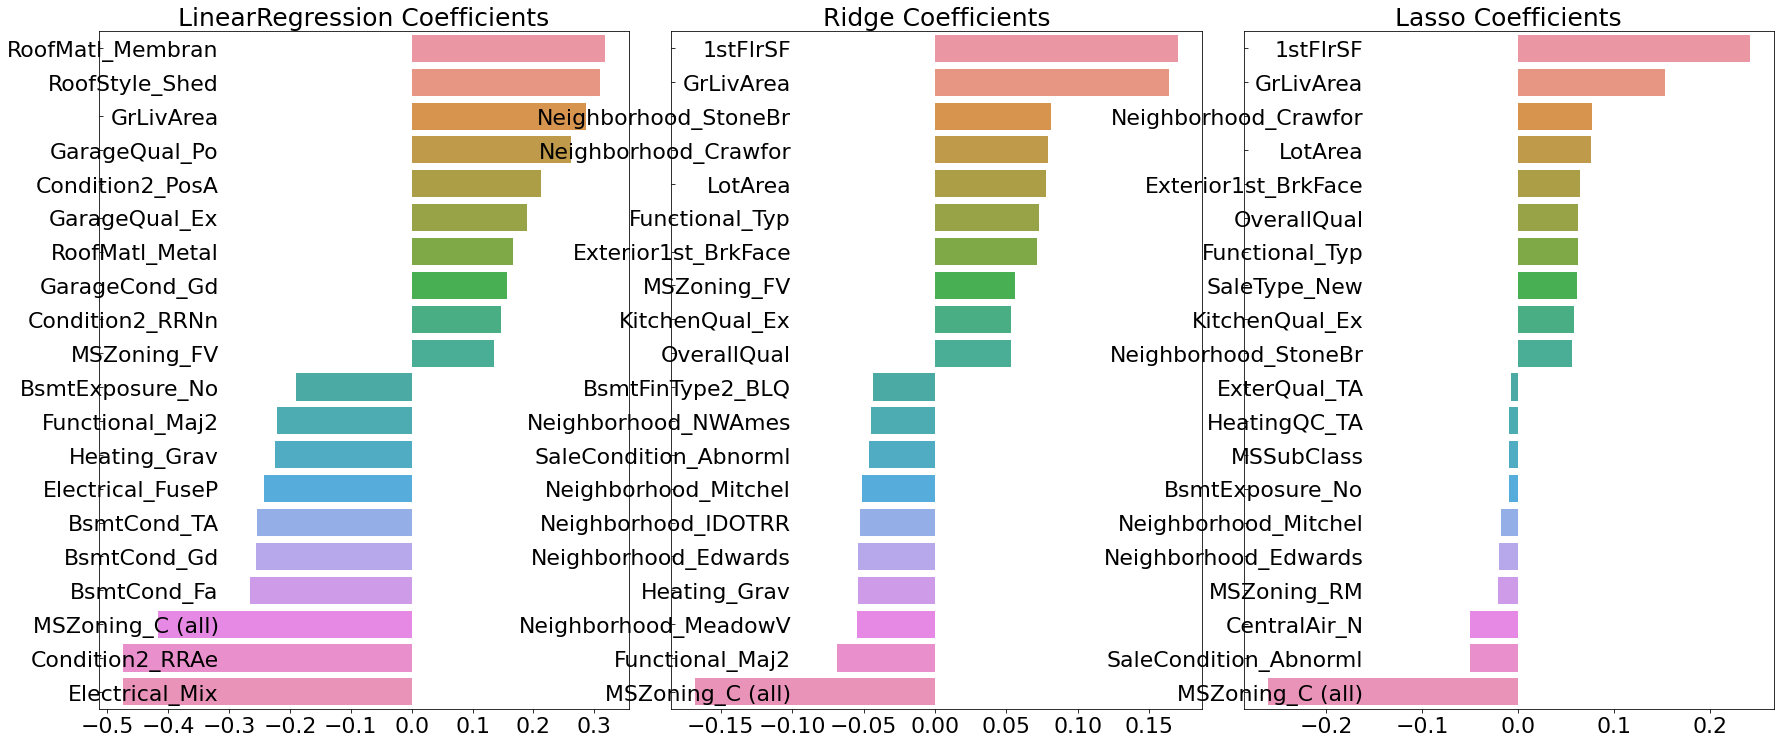

In [45]:
# 최적 alpha 값 설정한 뒤 모델 학습/예측/평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

models=[lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

### 회귀 트리 모델 학습/예측/평가

In [46]:
from xgboost import XGBRegressor

In [48]:
# 오래 걸리므로 다음과 같은 하이퍼 파라미터 설정을 미리 적용한 상태로 5폴드 세트에 대한 평균 RMSE 값 구하기
xgb_params={'n_estimators':[1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)
print_best_params(xgb_reg, xgb_params)

XGBRegressor 5 CV 시 최적 평균 RMSE 값:0.1178, 최적 alpha:{'n_estimators': 1000}


In [49]:
# LightGBM
from lightgbm import LGBMRegressor

In [50]:
lgbm_params = {'n_estimators':[1000]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
print_best_params(lgbm_reg, lgbm_params)

LGBMRegressor 5 CV 시 최적 평균 RMSE 값:0.1163, 최적 alpha:{'n_estimators': 1000}


### 회귀 모델의 예측 결과 혼합을 통한 최종 예측

In [54]:
# 릿지 + 라쏘
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test, pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE: {1}'.format(key, rmse))

In [55]:
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

pred = 0.4 * ridge_pred + 0.6 * lasso_pred
preds = {'최종 혼합':pred, 'Ridge':ridge_pred, 'Lasso':lasso_pred}

get_rmse_pred(preds)

최종 혼합 모델의 RMSE: 0.10007930884470519
Ridge 모델의 RMSE: 0.10345177546603272
Lasso 모델의 RMSE: 0.10024170460890039


- 최종 혼합 모델이 개별 모델보다 성능 면에서 약간 개선됨
- 0.4나 0.6을 정하는 특별한 기준은 없으며 다만 두 개 중 성능이 조금 좋은 쪽에 가중치를 약간 둠

In [56]:
# XGBoost + LightGBM
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)

xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

pred = 0.5 * xgb_pred + 0.5 * lgbm_pred
preds = {'최종 혼합':pred, 'XGBM':xgb_pred, 'LGBM':lgbm_pred}

get_rmse_pred(preds)

최종 혼합 모델의 RMSE: 0.10170077353447762
XGBM 모델의 RMSE: 0.10738295638346222
LGBM 모델의 RMSE: 0.10382510019327311


- 혼합 모델이 개별 모델보다 조금 향상됨

### 스태킹 앙상블 모델을 통한 회귀 예측

- 개별적인 기반 모델 + 이 개별 기반 모델의 예측 데이터를 학습 데이터로 만들어 학습하는 최종 메타 모델
- 여러 개별 모델의 예측 데이터를 각각 스태킹 형태로 결합해 최종 메타 모델의 학습용 피처 데이터 세트와 테스트용 피처 데이터 세트 만드는 것

In [57]:
# 개별 모델을 스태킹 모델로 제공하기 위해 데이터 세트 생성하기 위한 함수
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

In [58]:
# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    kf = KFold(n_splits=n_folds, shuffle=False, random_state=0)
    
    # 추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
    train_fold_pred = np.zeros((X_train_n.shape[0], 1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__, ' model 시작')
    
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출
        print('\t 폴드 세트 : ', folder_counter, ' 시작 ')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]
        
        # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행
        model.fit(X_tr, y_tr)
        # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1, 1)
        # 입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장
        test_pred[:, folder_counter] = model.predict(X_test_n)
    
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균해 테스트 데이터로 생성
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1, 1)
    
    # train_fold_pred 는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean 은 테스트 데이터
    return train_fold_pred, test_pred_mean

- 인자 : 개별 기반 모델, 원래 사용되는 학습 데이터와 테스트용 피처 데이터
- 개별 모델이 K-폴드 세트로 설정된 폴드 세트 내부에서 원본의 학습 데이터를 다시 추출해 학습과 예측 수행한 뒤 결과 저장
- 저장된 예측 데이터는 추후에 메타 모델의 학습 피처 데이터 세트로 이용
- 폴드 세트 내부 학습 데이터로 학습된 개별 모델이 인자로 입력된 원본 테스트 데이터 예측한 뒤 예측 결과를 평균해 테스트 데이터로 생성

In [59]:
# ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

Ridge  model 시작
	 폴드 세트 :  0  시작 
	 폴드 세트 :  1  시작 
	 폴드 세트 :  2  시작 
	 폴드 세트 :  3  시작 
	 폴드 세트 :  4  시작 
Lasso  model 시작
	 폴드 세트 :  0  시작 
	 폴드 세트 :  1  시작 
	 폴드 세트 :  2  시작 
	 폴드 세트 :  3  시작 
	 폴드 세트 :  4  시작 
XGBRegressor  model 시작
	 폴드 세트 :  0  시작 
	 폴드 세트 :  1  시작 
	 폴드 세트 :  2  시작 
	 폴드 세트 :  3  시작 
	 폴드 세트 :  4  시작 
LGBMRegressor  model 시작
	 폴드 세트 :  0  시작 
	 폴드 세트 :  1  시작 
	 폴드 세트 :  2  시작 
	 폴드 세트 :  3  시작 
	 폴드 세트 :  4  시작 


In [60]:
# step2 각 모델별 학습 데이터와 테스트 데이터 합치기
Stack_final_X_train = np.concatenate((ridge_train, lasso_train, xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test, xgb_test, lgbm_test), axis=1)

# 최종 메타 모델은 라쏘 모델
meta_model_lasso = Lasso(alpha=0.0005)

meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test, final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse)

스태킹 회귀 모델의 최종 RMSE 값은: 0.0979915296518969
